___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way.

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [2]:
pip install scikit-plot

In [ ]:
conda install -c conda-forge xgboost

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Nanet\anaconda3

  added / updated specs:
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0          11 KB  conda-forge
    libxgboost-1.7.3           |       hd77b12b_0         1.5 MB
    py-xgboost-1.7.3           |   py39haa95532_0         197 KB
    xgboost-1.7.3              |   py39haa95532_0          12 KB
    ------------------------------------------------------------
                                           Total:         1.7 MB

The following NEW packages will be INSTALLED:

  _py-xgboost-mutex  conda-forge/win-64::_py-xgboost-mutex-2.0-cpu_0 None
  libxgboost         pkgs/main/win-64::libxgboost-1.7.3-hd77b12b_0 None
  py-xgboost         pkgs/main/win-64::py-xgboost-1.7.3-py39haa95532_0 None
  xgboost            pkgs/main/



==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.9.0

Please update conda by running

    $ conda update -n base -c defaults conda




_py-xgboost-mutex-2. | 11 KB     |            |   0% 
_py-xgboost-mutex-2. | 11 KB     | ########## | 100% 
_py-xgboost-mutex-2. | 11 KB     | ########## | 100% 

py-xgboost-1.7.3     | 197 KB    |            |   0% 
py-xgboost-1.7.3     | 197 KB    | 8          |   8% 
py-xgboost-1.7.3     | 197 KB    | #6         |  16% 
py-xgboost-1.7.3     | 197 KB    | ##4        |  24% 
py-xgboost-1.7.3     | 197 KB    | ###2       |  32% 
py-xgboost-1.7.3     | 197 KB    | ####       |  41% 
py-xgboost-1.7.3     | 197 KB    | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done
Retrieving notices: ...working... done


In [4]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6)
from sklearn.preprocessing import StandardScaler #Z-score variable
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.options.display.float_format = '{:.3f}'.format

%matplotlib inline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    recall_score,
    precision_score,
    make_scorer,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    average_precision_score,
    roc_curve,
    auc,
)
#from scikitplot.metrics import plot_roc,plot_precision_recall

import xgboost
from sklearn.model_selection import GridSearchCV ,cross_validate
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import xgboost

xgboost.__version__

'1.7.3'

In [ ]:
import sklearn

sklearn.__version__

'1.3.1'

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [6]:
import glob
folder = "/content/drive/MyDrive/ANSUR SolidersDataSet"
csv_files = glob.glob(folder +'/*.csv')
csv_files

['/content/drive/MyDrive/ANSUR SolidersDataSet/ANSUR II FEMALE Public.csv',
 '/content/drive/MyDrive/ANSUR SolidersDataSet/ANSUR II MALE Public.csv']

In [7]:
#Conatenate two CSV files
df_soliders = pd.concat([pd.read_csv(file , encoding='latin-1') for file in csv_files ], ignore_index=True)


## Explore Data

In [ ]:
df_soliders.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [ ]:
df_soliders.shape

(6068, 108)

In [ ]:
df_soliders.describe().T
#SubjectNumericRace feayure has a lot of outliers because the std>mean

,count,mean,std,min,25%,50%,75%,max
SubjectId,6068.000,20757.198,13159.391,10027.000,14841.750,20063.500,27234.500,920103.000
abdominalextensiondepthsitting,6068.000,246.469,37.400,155.000,219.000,242.000,271.000,451.000
acromialheight,6068.000,1406.161,79.091,1115.000,1350.000,1410.000,1462.000,1683.000
acromionradialelength,6068.000,327.374,20.720,249.000,313.000,328.000,341.250,393.000
anklecircumference,6068.000,224.891,16.052,156.000,214.000,225.000,235.000,293.000
axillaheight,6068.000,1299.609,72.022,1038.000,1249.000,1302.000,1349.000,1553.000
balloffootcircumference,6068.000,244.193,16.845,186.000,232.000,245.000,256.000,306.000
balloffootlength,6068.000,194.755,13.516,151.000,185.000,195.000,204.000,245.000
biacromialbreadth,6068.000,399.204,30.237,283.000,376.000,404.000,421.000,489.000
bicepscircumferenceflexed,6068.000,340.934,41.520,216.000,311.000,341.000,370.000,490.000


In [ ]:
#drop unimportant and self-reported features
df_soliders.drop(columns=["SubjectId","SubjectNumericRace","Ethnicity","Age","Heightin","Weightlbs" ,"WritingPreference","Date","Installation","Component","Branch","PrimaryMOS"], inplace=True)

In [ ]:
df_soliders.shape

(6068, 108)

In [ ]:
#check null values
df_soliders.isnull().sum()
# there are not any null values

abdominalextensiondepthsitting    0
acromialheight                    0
acromionradialelength             0
anklecircumference                0
axillaheight                      0
balloffootcircumference           0
balloffootlength                  0
biacromialbreadth                 0
bicepscircumferenceflexed         0
bicristalbreadth                  0
bideltoidbreadth                  0
bimalleolarbreadth                0
bitragionchinarc                  0
bitragionsubmandibulararc         0
bizygomaticbreadth                0
buttockcircumference              0
buttockdepth                      0
buttockheight                     0
buttockkneelength                 0
buttockpopliteallength            0
calfcircumference                 0
cervicaleheight                   0
chestbreadth                      0
chestcircumference                0
chestdepth                        0
chestheight                       0
crotchheight                      0
crotchlengthomphalion       

In [ ]:
df_soliders.describe().T
# after checking the mean ,std ,min and max of the features we conclude that there are no null values
# and outliers because the mean amd std are noy very close
# but maybe I need to check and take alook to make sure on these (earprotrusion ,earbreadth ,weightkg,shouldercircumference) features

,count,mean,std,min,25%,50%,75%,max
abdominalextensiondepthsitting,6068.000,246.469,37.400,155.000,219.000,242.000,271.000,451.000
acromialheight,6068.000,1406.161,79.091,1115.000,1350.000,1410.000,1462.000,1683.000
acromionradialelength,6068.000,327.374,20.720,249.000,313.000,328.000,341.250,393.000
anklecircumference,6068.000,224.891,16.052,156.000,214.000,225.000,235.000,293.000
axillaheight,6068.000,1299.609,72.022,1038.000,1249.000,1302.000,1349.000,1553.000
balloffootcircumference,6068.000,244.193,16.845,186.000,232.000,245.000,256.000,306.000
balloffootlength,6068.000,194.755,13.516,151.000,185.000,195.000,204.000,245.000
biacromialbreadth,6068.000,399.204,30.237,283.000,376.000,404.000,421.000,489.000
bicepscircumferenceflexed,6068.000,340.934,41.520,216.000,311.000,341.000,370.000,490.000
bicristalbreadth,6068.000,274.735,19.221,197.000,262.000,274.000,288.000,362.000


In [ ]:
df_soliders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 96 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   abdominalextensiondepthsitting  6068 non-null   int64 
 1   acromialheight                  6068 non-null   int64 
 2   acromionradialelength           6068 non-null   int64 
 3   anklecircumference              6068 non-null   int64 
 4   axillaheight                    6068 non-null   int64 
 5   balloffootcircumference         6068 non-null   int64 
 6   balloffootlength                6068 non-null   int64 
 7   biacromialbreadth               6068 non-null   int64 
 8   bicepscircumferenceflexed       6068 non-null   int64 
 9   bicristalbreadth                6068 non-null   int64 
 10  bideltoidbreadth                6068 non-null   int64 
 11  bimalleolarbreadth              6068 non-null   int64 
 12  bitragionchinarc                6068 non-null   

In [ ]:
#show ing only non numeric features
df_soliders.select_dtypes("object").head()

,Gender,SubjectsBirthLocation
0,Female,Germany
1,Female,California
2,Female,Texas
3,Female,District of Columbia
4,Female,Texas


In [ ]:
#count the object features' values
for i in df_soliders.select_dtypes("object"):

    print(i, len(df_soliders[i].value_counts()))

Gender 2
SubjectsBirthLocation 152


In [ ]:
df_soliders["Gender"].value_counts()

Gender
Male      4082
Female    1986
Name: count, dtype: int64

In [ ]:
#count the unique values of SubjectsBirthLocation feature to explore it
df_soliders["SubjectsBirthLocation"].value_counts()

SubjectsBirthLocation
California                  446
New York                    420
Texas                       397
Indiana                     266
Oklahoma                    221
Illinois                    216
Florida                     210
Minnesota                   200
Michigan                    196
Mississippi                 194
Georgia                     170
Alabama                     164
South Carolina              161
North Carolina              149
Ohio                        142
Louisiana                   137
Pennsylvania                132
Virginia                    118
Massachusetts               112
Wisconsin                   102
Germany                      92
New Jersey                   89
Puerto Rico                  88
Missouri                     84
Arizona                      84
Colorado                     81
Maryland                     80
Tennessee                    74
Kentucky                     69
Washington                   66
Kansas            

In [ ]:
# count the unique values of target DOD Race feature and save it in a variable
vc = df_soliders["DODRace"].value_counts()
vc

DODRace
1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: count, dtype: int64

In [ ]:
#number of races classes taht has number of observations below 500
sum(df_soliders["DODRace"].value_counts()<500)

4

In [ ]:
# U]SUM the number of observations of the ALL race classes below 500
vc[vc<500].sum()

299

In [11]:
# Calculate the percentage of the above observations to the whole dataset
299/6068

0.0492748846407383

In [ ]:
df_soliders["acromialheight"].value_counts()

acromialheight
1418    43
1435    41
1427    38
1375    38
1443    38
1410    38
1422    37
1428    37
1434    37
1450    37
1415    36
1468    36
1395    36
1437    35
1460    35
1425    34
1423    34
1390    34
1447    34
1416    34
1455    33
1406    33
1413    33
1380    33
1429    32
1374    32
1449    32
1400    32
1399    31
1378    31
1398    31
1368    31
1432    31
1385    30
1388    30
1417    30
1363    30
1414    30
1456    30
1373    29
1433    29
1370    29
1453    29
1430    29
1384    29
1383    29
1361    29
1444    28
1389    28
1469    28
1419    28
1393    28
1440    28
1424    28
1475    28
1358    28
1391    28
1472    28
1405    28
1355    27
1421    27
1466    27
1426    27
1402    27
1438    27
1442    27
1340    26
1350    26
1343    26
1439    26
1362    26
1396    26
1409    26
1352    26
1392    26
1448    26
1328    26
1315    26
1372    26
1412    26
1464    26
1474    26
1452    25
1476    25
1365    25
1467    25
1458    25
1473    25
1360    25
1338  

In [ ]:
#chech duplicates
df_soliders.duplicated().sum()

0

# Features Engineering

✏️Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

In [12]:
# list the race with less 500 observations and save it
# then we will drop because the model can't learn if it is below 500
drop_Race = df_soliders.DODRace.value_counts()[df_soliders.DODRace.value_counts() < 500 ].index
drop_Race

Int64Index([4, 6, 5, 8], dtype='int64')

In [13]:
for i in drop_Race:
    drop_index = df_soliders[df_soliders['DODRace'] == i].index
    df_soliders.drop(index = drop_index, inplace=True)

df_soliders.reset_index(drop=True, inplace=True)
# We pull all the races in the races list in order and find the indexes of the observations of these races first.
#then save the index in the drop_index var
# We drop the indexes of Obs in the (drop_Race) list from our data every time.
# Since the deleted indexes in the last stage will not appear in our data, we reset the indexes starting from 0.

In [14]:
#the DODRace feature after dropping the observations with less than 500
df_soliders["DODRace"].value_counts()

1    3792
2    1298
3     679
Name: DODRace, dtype: int64

In [15]:
# The shape of the dataset after dropping the observations with less than 500 of the race feature
df_soliders.shape

(5769, 108)

In [16]:
#This is a dictionary of states and their regions.
states_by_region = {
    "Alabama": "South",
    "Alaska": "West",
    "Arizona": "West",
    "Arkansas": "South",
    "California": "West",
    "Colorado": "West",
    "Connecticut": "Northeast",
    "Delaware": "Mid Atlantic",
    "Florida": "South",
    "Georgia": "South",
    "Hawaii": "West",
    "Idaho": "West",
    "Illinois": "Midwest",
    "Indiana": "Midwest",
    "Iowa": "Midwest",
    "Kansas": "Midwest",
    "Kentucky": "South",
    "Louisiana": "South",
    "Maine": "Northeast",
    "Maryland": "Mid Atlantic",
    "Massachusetts": "Northeast",
    "Michigan": "Midwest",
    "Minnesota": "Midwest",
    "Mississippi": "South",
    "Missouri": "Midwest",
    "Montana": "West",
    "Nebraska": "Midwest",
    "Nevada": "West",
    "New Hampshire": "Northeast",
    "New Jersey": "Mid Atlantic",
    "New Mexico": "West",
    "New York": "Northeast",
    "North Carolina": "South",
    "North Dakota": "Midwest",
    "Ohio": "Midwest",
    "Oklahoma": "South",
    "Oregon": "West",
    "Pennsylvania": "Mid Atlantic",
    "Rhode Island": "Northeast",
    "South Carolina": "South",
    "South Dakota": "Midwest",
    "Tennessee": "South",
    "Texas": "South",
    "Utah": "West",
    "Vermont": "Northeast",
    "Virginia": "Mid Atlantic",
    "Washington": "West",
    "West Virginia": "South",
    "Wisconsin": "Midwest",
    "Wyoming": "West",
    "District of Columbia": "Mid Atlantic"
}


In [17]:
countries_by_continent = {
    "Afghanistan": "Asia",
    "Albania": "Europe",
    "Algeria": "Africa",
    "American Samoa": "Oceania",
    "Andorra": "Europe",
    "Angola": "Africa",
    "Antigua and Barbuda": "North America",
    "Argentina": "South America",
    "Armenia": "Asia",
    "Australia": "Oceania",
    "Austria": "Europe",
    "Azerbaijan": "Asia",
    "Bahamas": "North America",
    "Bahrain": "Asia",
    "Bangladesh": "Asia",
    "Barbados": "North America",
    "Belarus": "Europe",
    "Belgium": "Europe",
    "Belize": "North America",
    "Benin": "Africa",
    "Bhutan": "Asia",
    "Bolivia": "South America",
    "Bosnia and Herzegovina": "Europe",
    "Botswana": "Africa",
    "Brazil": "South America",
    "British Virgin Islands": "North America",
    "Brunei": "Asia",
    "Bulgaria": "Europe",
    "Burkina Faso": "Africa",
    "Burundi": "Africa",
    "Cambodia": "Asia",
    "Cameroon": "Africa",
    "Canada": "North America",
    "Cape Verde": "Africa",
    "Central African Republic": "Africa",
    "Chad": "Africa",
    "Chile": "South America",
    "China": "Asia",
    "Colombia": "South America",
    "Comoros": "Africa",
    "Congo, Democratic Republic of the": "Africa",
    "Congo, Republic of the": "Africa",
    "Costa Rica": "North America",
    "Côte d'Ivoire": "Africa",
    "Croatia": "Europe",
    "Cuba": "North America",
    "Cyprus": "Europe",
    "Czech Republic": "Europe",
    "Denmark": "Europe",
    "Djibouti": "Africa",
    "Dominica": "North America",
    "Dominican Republic": "North America",
    "East Timor": "Asia",
    "Ecuador": "South America",
    "Egypt": "Africa",
    "El Salvador": "North America",
    "England": "Europe",
    "Equatorial Guinea": "Africa",
    "Eritrea": "Africa",
    "Estonia": "Europe",
    "Eswatini": "Africa",
    "Ethiopia": "Africa",
    "Federated States of Micronesia": "Oceania",
    "Fiji": "Oceania",
    "Finland": "Europe",
    "France": "Europe",
    "French Guiana": "South America",
    "Gabon": "Africa",
    "Gambia": "Africa",
    "Georgia": "Asia",
    "Germany": "Europe",
    "Ghana": "Africa",
    "Greece": "Europe",
    "Grenada": "North America",
    "Guam": "Oceania",
    "Guadalupe" : "North America",
    "Guatemala": "North America",
    "Guinea": "Africa",
    "Guinea-Bissau": "Africa",
    "Guyana": "South America",
    "Haiti": "North America",
    "Honduras": "North America",
    "Hungary": "Europe",
    "Iceland": "Europe",
    "India": "Asia",
    "Indonesia": "Asia",
    "Iran": "Asia",
    "Iraq": "Asia",
    "Ireland": "Europe",
    "Israel": "Asia",
    "Italy": "Europe",
    "Ivory Coast": "Africa",
    "Jamaica": "North America",
    "Japan": "Asia",
    "Jordan": "Asia",
    "Kazakhstan": "Asia",
    "Kenya": "Africa",
    "Kiribati": "Oceania",
    "Kosovo": "Europe",
    "Kuwait": "Asia",
    "Kyrgyzstan": "Asia",
    "Laos": "Asia",
    "Latvia": "Europe",
    "Lebanon": "Asia",
    "Lesotho": "Africa",
    "Liberia": "Africa",
    "Libya": "Africa",
    "Liechtenstein": "Europe",
    "Lithuania": "Europe",
    "Luxembourg": "Europe",
    "Macedonia, Republic of": "Europe",
    "Madagascar": "Africa",
    "Malawi": "Africa",
    "Malaysia": "Asia",
    "Maldives": "Asia",
    "Mali": "Africa",
    "Malta": "Europe",
    "Marshall Islands": "Oceania",
    "Mauritania": "Africa",
    "Mauritius": "Africa",
    "Mexico": "North America",
    "Micronesia": "Oceania",
    "Moldova": "Europe",
    "Monaco": "Europe",
    "Mongolia": "Asia",
    "Montenegro": "Europe",
    "Morocco": "Africa",
    "Mozambique": "Africa",
    "Myanmar (Burma)": "Asia",
    "Namibia": "Africa",
    "Nauru": "Oceania",
    "Nepal": "Asia",
    "Netherlands": "Europe",
    "New Zealand": "Oceania",
    "Nicaragua": "North America",
    "Niger": "Africa",
    "Nigeria": "Africa",
    "North Korea": "Asia",
    "Norway": "Europe",
    "Oman": "Asia",
    "Pakistan": "Asia",
    "Palau": "Oceania",
    "Palestine": "Asia",
    "Panama": "North America",
    "Papua New Guinea": "Oceania",
    "Paraguay": "South America",
    "Peru": "South America",
    "Philippines": "Asia",
    "Poland": "Europe",
    "Portugal": "Europe",
    "Puerto Rico": "North America",
    "Qatar": "Asia",
    "Romania": "Europe",
    "Russia": "Europe",
    "Rwanda": "Africa",
    "Saint Kitts and Nevis": "North America",
    "Saint Lucia": "North America",
    "Saint Vincent and the Grenadines": "North America",
    "Samoa": "Oceania",
    "San Marino": "Europe",
    "Sao Tome and Principe": "Africa",
    "Saudi Arabia": "Asia",
    "Scotland": "Europe",
    "Senegal": "Africa",
    "Serbia": "Europe",
    "Seychelles": "Africa",
    "Sierra Leone": "Africa",
    "Singapore": "Asia",
    "Slovakia": "Europe",
    "Slovenia": "Europe",
    "Solomon Islands": "Oceania",
    "Somalia": "Africa",
    "South Africa": "Africa",
    "South Korea": "Asia",
    "South Sudan": "Africa",
    "Spain": "Europe",
    "Sri Lanka": "Asia",
    "Sudan": "Africa",
    "Suriname": "South America",
    "Swaziland": "Africa",
    "Sweden": "Europe",
    "Switzerland": "Europe",
    "Syria": "Asia",
    "Taiwan": "Asia",
    "Tajikistan": "Asia",
    "Tanzania": "Africa",
    "Thailand": "Asia",
    "Togo": "Africa",
    "Tonga": "Oceania",
    "Trinidad and Tobago": "North America",
    "Tunisia": "Africa",
    "Turkey": "Europe",
    "Turkmenistan": "Asia",
    "Tuvalu": "Oceania",
    "Uganda": "Africa",
    "Ukraine": "Europe",
    "United Arab Emirates": "Asia",
    "United Kingdom": "Europe",
    "United States": "North America",
    "Uruguay": "South America",
    "US Virgin Islands": "North America",
    "Uzbekistan": "Asia",
    "Vanuatu": "Oceania",
    "Vatican City": "Europe",
    "Venezuela": "South America",
    "Vietnam": "Asia",
    "Wales": "Europe",
    "Yemen": "Asia",
    "Zambia": "Africa",
    "Zimbabwe": "Africa",
    "South America": "South America",
    "Burma": "Asia",
    "Korea": "Asia",
    "Northern Mariana Islands": "Oceania",
    "Bermuda": "North America",
}


In [18]:
df_soliders["SubjectsBirthLocation"] = [i if i in states_by_region else countries_by_continent[i] for i in df_soliders["SubjectsBirthLocation"].values ]
df_soliders["SubjectsBirthLocation"].value_counts()

California              417
New York                411
Texas                   386
North America           264
Indiana                 264
Florida                 210
Illinois                210
Oklahoma                205
Minnesota               194
Michigan                194
Mississippi             193
Georgia                 168
Alabama                 164
South Carolina          161
Europe                  146
North Carolina          145
Ohio                    139
Louisiana               136
Pennsylvania            130
Virginia                113
Massachusetts           109
Wisconsin                99
New Jersey               88
Missouri                 83
Maryland                 78
Colorado                 78
Arizona                  75
Tennessee                74
Kentucky                 67
Kansas                   62
Washington               61
Iowa                     55
Arkansas                 53
South Dakota             53
South America            43
Oregon              

In [19]:
df_soliders["SubjectsBirthLocation"].nunique()

57

In [20]:
#change the DODRace values to the their corresponding Race Name
df_soliders["DODRace"] = df_soliders.DODRace.map(
    {
        1: "White",
        2: "Black",
        3: "Hispanic",
    }
)

In [21]:
df_soliders['DODRace'].value_counts()

White       3792
Black       1298
Hispanic     679
Name: DODRace, dtype: int64

# Visualizing the data

**Let's Discover our dataset and visualize them **

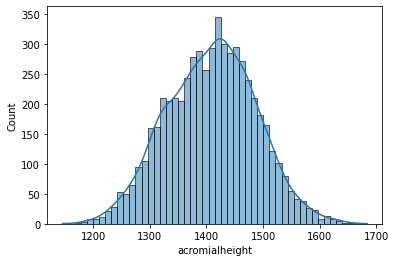

In [ ]:
 sns.histplot(df_soliders.acromialheight, bins=50, kde=True);

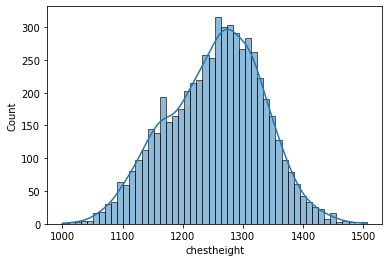

In [ ]:
sns.histplot(df_soliders.chestheight, bins=50, kde=True);

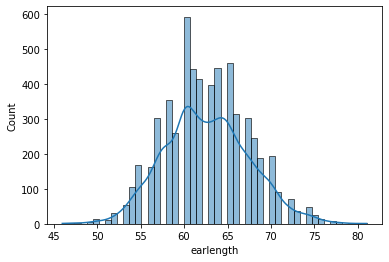

In [ ]:
sns.histplot(df_soliders.earlength, bins=50, kde=True);

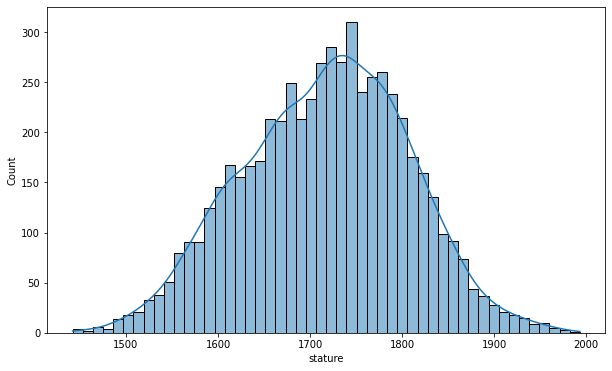

In [ ]:
sns.histplot(df_soliders.stature, bins=50, kde=True);

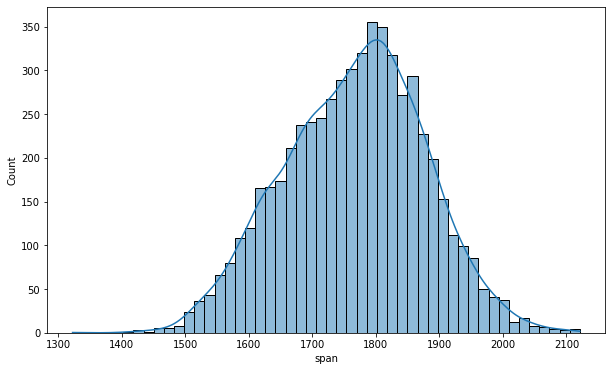

In [ ]:
sns.histplot(df_soliders.span, bins=50, kde=True);

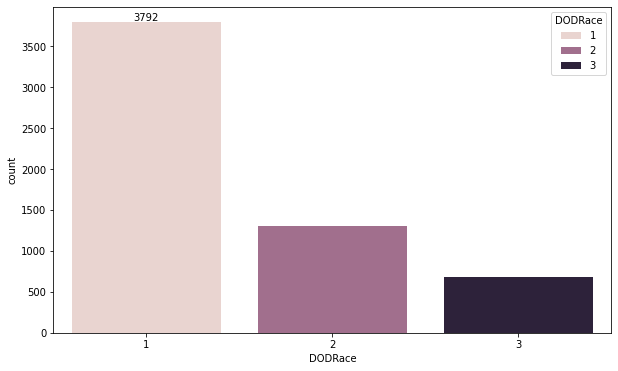

In [ ]:
plt.rcParams["figure.figsize"] = (10,6) # Set default figure size
ax = sns.countplot(x="DODRace", data = df_soliders , hue = "DODRace")
ax.bar_label(ax.containers[0]);

# the below plot demonstrates the problem of imbalance classes

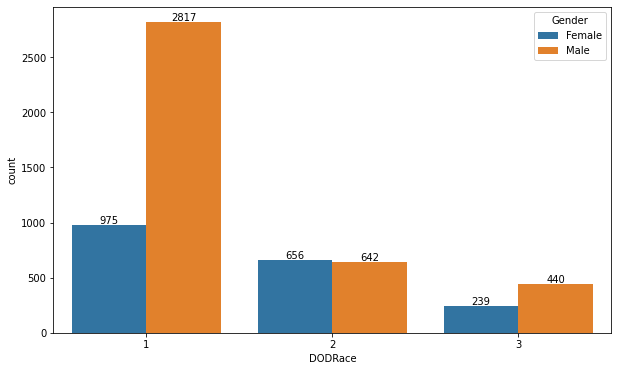

In [ ]:
ax = sns.countplot(x="DODRace", data = df_soliders, hue = "Gender")
for p in ax.containers:
    ax.bar_label(p)

# distribution of Races by gender

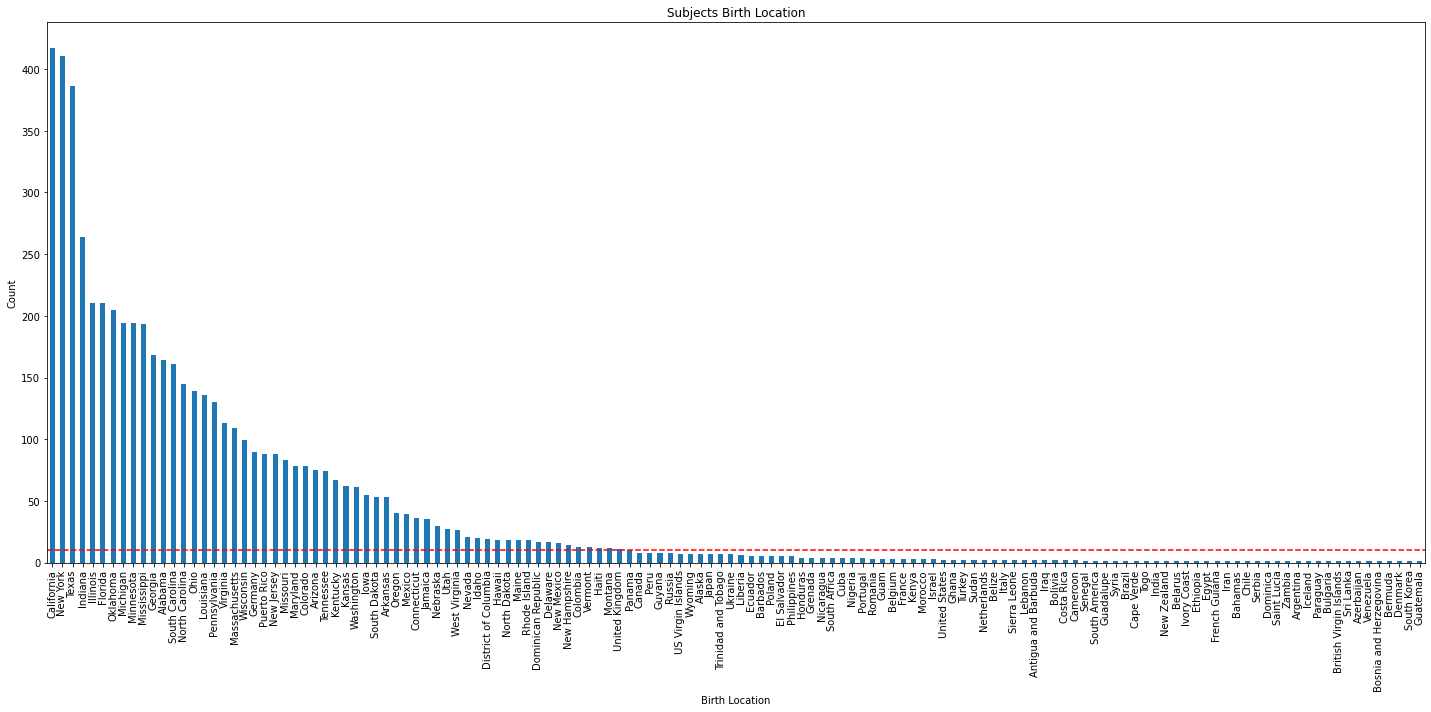

In [ ]:
df_soliders.SubjectsBirthLocation.value_counts().plot(kind="bar", figsize=(20,10))
plt.title("Subjects Birth Location")
plt.xlabel("Birth Location")
plt.ylabel("Count")
plt.axhline(10, color='r', linestyle='--')  # Some research says 10 rows are enough for each category to be represented
plt.tight_layout();

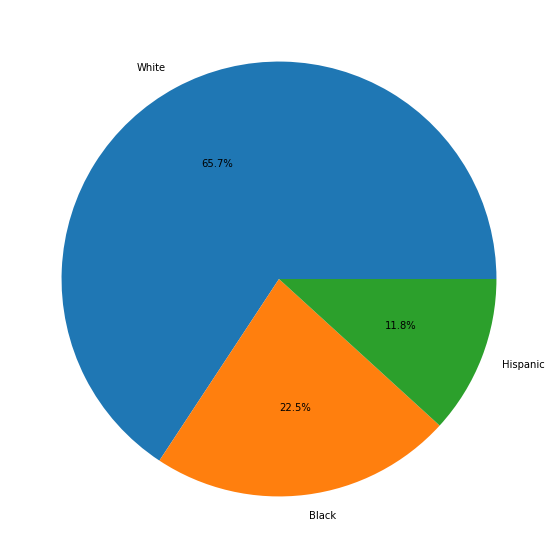

In [ ]:
df_soliders["DODRace"].value_counts().plot(kind="pie", autopct="%1.1f%%", figsize=(10, 10))
plt.ylabel("");

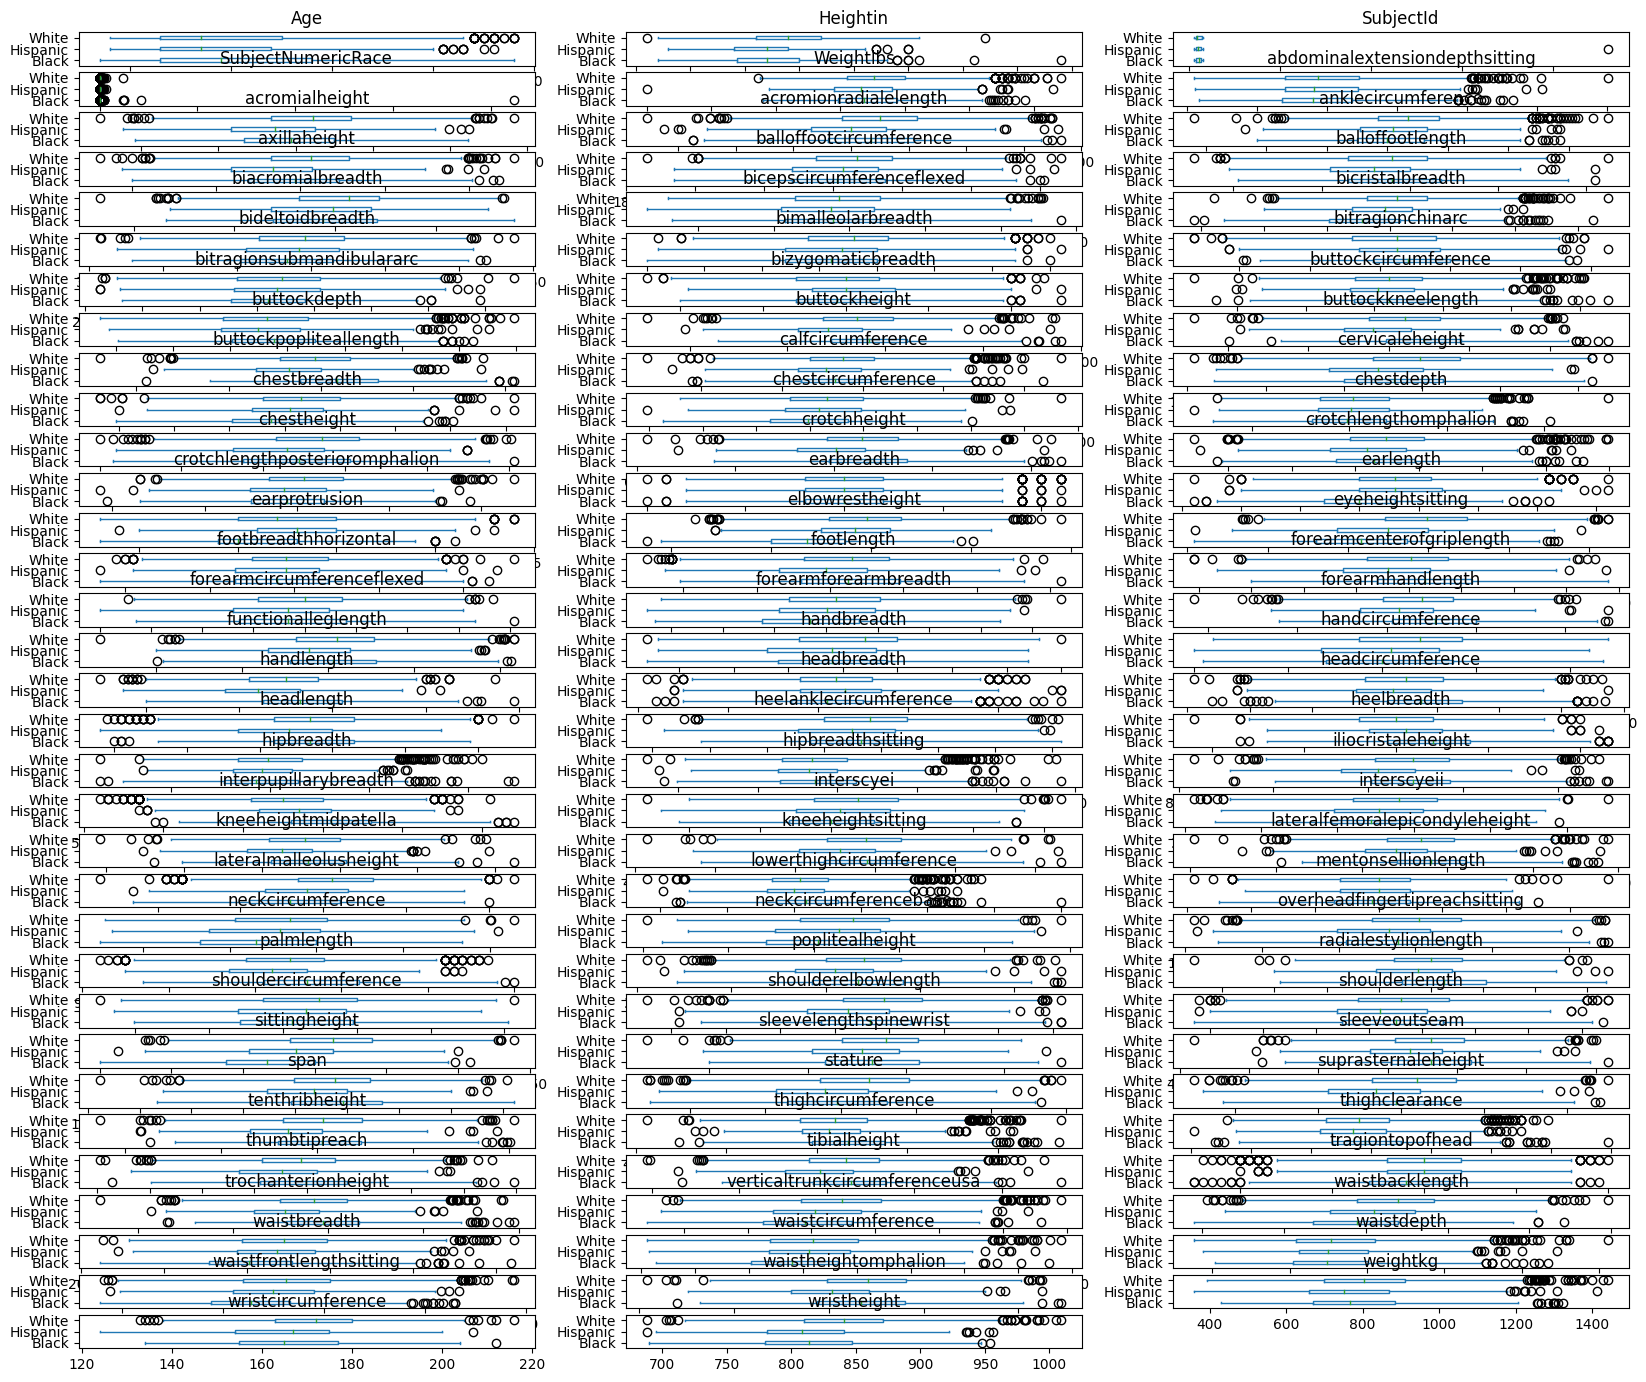

In [26]:
df_soliders.plot(by ='DODRace', kind="box", subplots=True, layout=(77, 3), figsize=(20, 40), vert=False, sharex=False, sharey=False)
plt.tight_layout();

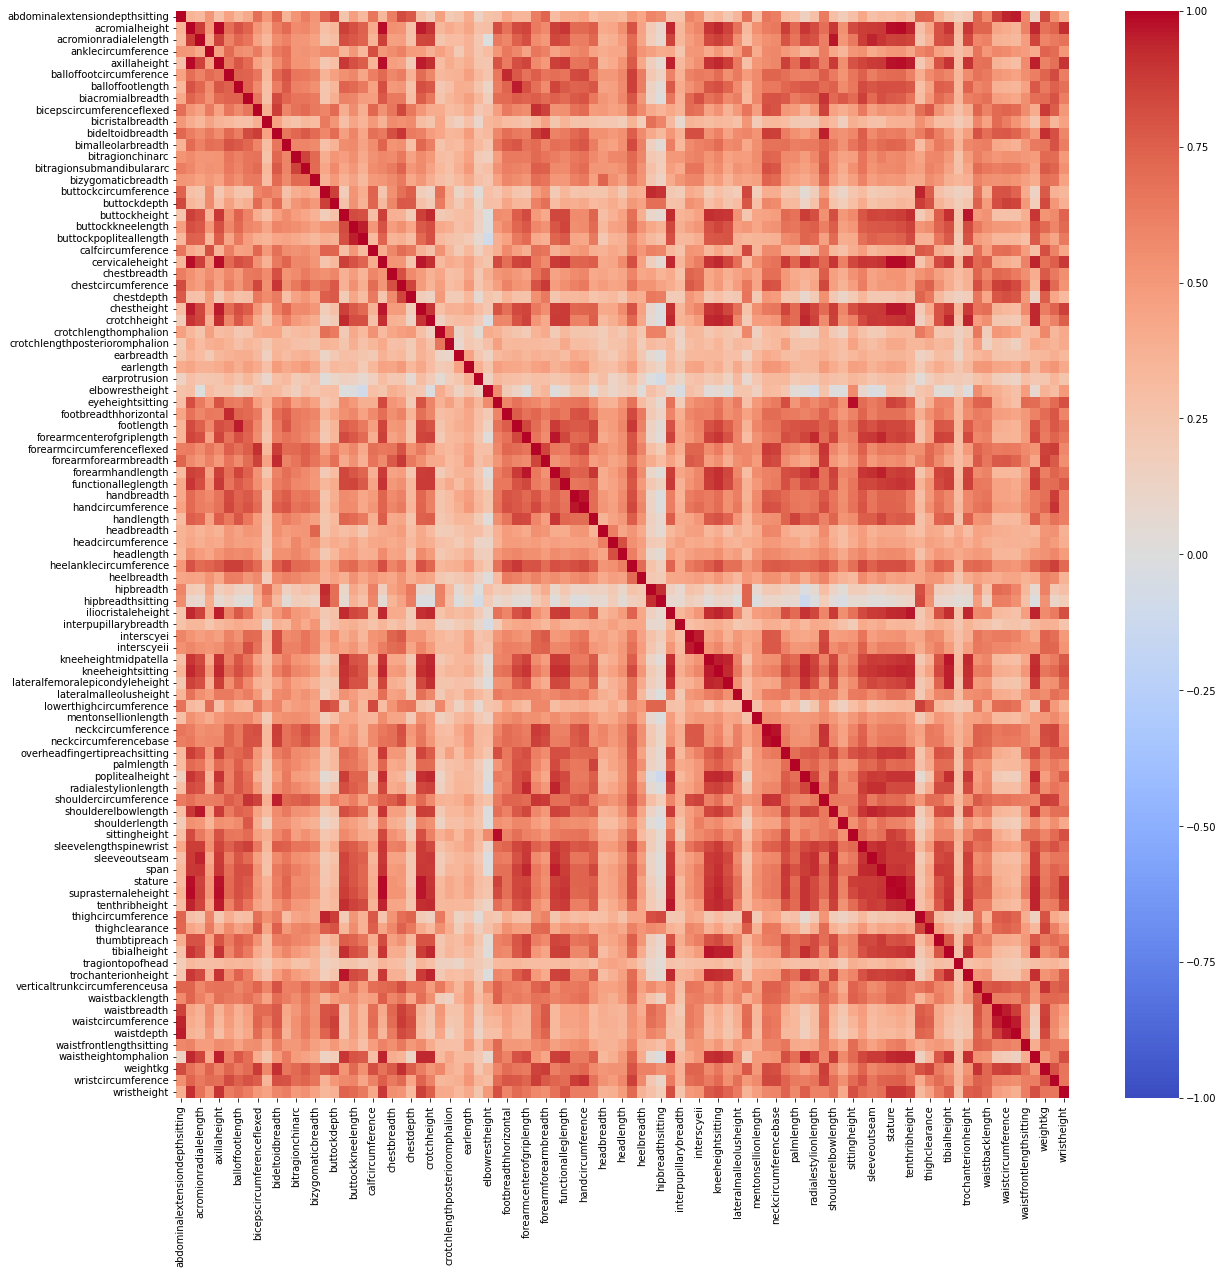

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_soliders.corr(numeric_only=True), vmin=-1, vmax=1, cmap="coolwarm");


ValueError: num must be an integer with 1 <= num <= 16, not 17

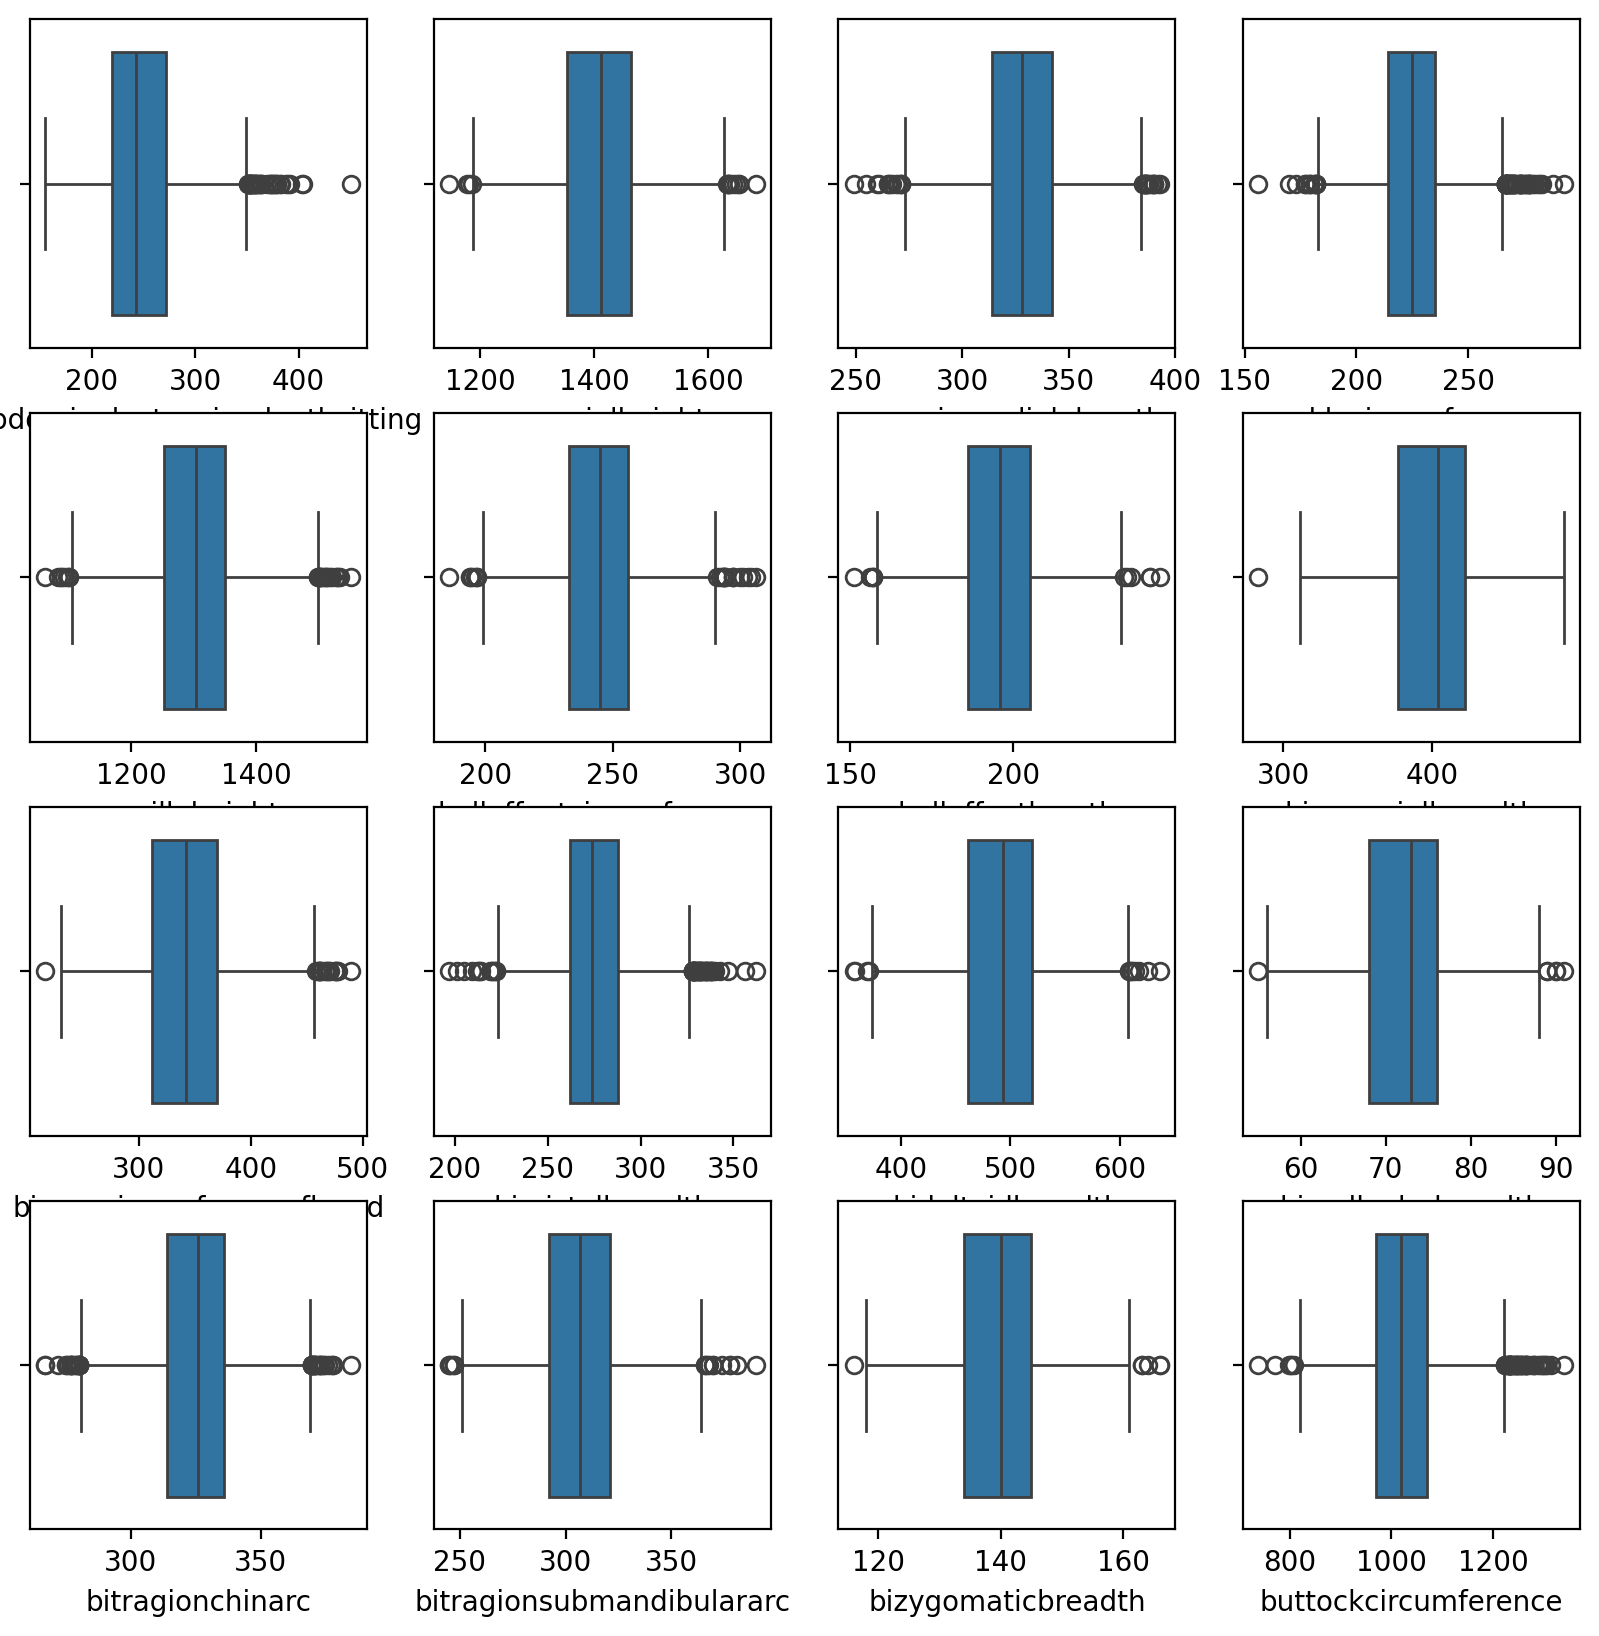

In [ ]:
fig = plt.figure(figsize=(10,10), dpi=200)

for i, col in enumerate(df_soliders.select_dtypes(["float", "int"]).columns):
        plt.subplot(4,4,i+1)
        ax = sns.boxplot(x=df_soliders[col])

plt.tight_layout();

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [28]:
#dividing to X and Y set
x = df_soliders.drop("DODRace",axis=1)
y = df_soliders["DODRace"]

In [29]:
x.shape , y.shape

((5769, 107), (5769,))

In [30]:
#train- test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

In [31]:
y_train.value_counts()

White       3034
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

In [ ]:
y_test.value_counts()

DODRace
White       758
Black       260
Hispanic    136
Name: count, dtype: int64

In [32]:
print("Train features shape : ", x_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", x_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (4615, 107)
Train target shape   :  (4615,)
Test features shape  :  (1154, 107)
Test target shape    :  (1154,)


In [ ]:
ohe = OneHotEncoder(sparse = False)#instintiate (make an instance of it)

In [ ]:
#show ing only non numeric features
df_soliders.select_dtypes("object").head(1)

,Gender,SubjectsBirthLocation,DODRace
0,Female,Europe,Black


# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [ ]:
#make a column transformer for the different preprocessing steps
Column_Transform = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), ['Gender','SubjectsBirthLocation']),
                                       remainder='passthrough')

In [ ]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [ ]:
#Create a pipeline for the vanilla Logistic regression
# consist of one hot encoder , min max scaler and the Logistic regression model
Operations = [("ColumnTransformer",Column_Transform ),
              ("Scaler", MinMaxScaler()),
              ("Logistic_Reg", LogisticRegression())]

Pipe_Log_Model = Pipeline(steps=Operations)

Pipe_Log_Model.fit(x_train, y_train)

Pipeline(steps=[('ColumnTransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'SubjectsBirthLocation'])])),
                ('Scaler', MinMaxScaler()),
                ('Logistic_Reg', LogisticRegression())])

In [ ]:
#Evaluation Results for vanilla Logistic regression
eval_metric(Pipe_Log_Model, x_train, y_train, x_test, y_test)

Test_Set
[[231   8  21]
 [ 14  81  41]
 [  5  20 733]]
              precision    recall  f1-score   support

       Black       0.92      0.89      0.91       260
    Hispanic       0.74      0.60      0.66       136
       White       0.92      0.97      0.94       758

    accuracy                           0.91      1154
   macro avg       0.86      0.82      0.84      1154
weighted avg       0.90      0.91      0.90      1154


Train_Set
[[ 939   23   76]
 [  32  304  207]
 [  23   53 2958]]
              precision    recall  f1-score   support

       Black       0.94      0.90      0.92      1038
    Hispanic       0.80      0.56      0.66       543
       White       0.91      0.97      0.94      3034

    accuracy                           0.91      4615
   macro avg       0.89      0.81      0.84      4615
weighted avg       0.91      0.91      0.91      4615



In [ ]:

scores = cross_validate(Pipe_Log_Model, x_train, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]


test_accuracy              0.898
train_accuracy             0.909
test_precision_weighted    0.894
train_precision_weighted   0.906
test_recall_weighted       0.898
train_recall_weighted      0.909
test_f1_weighted           0.892
train_f1_weighted          0.904
dtype: float64

### Logistic Model GridsearchCV

In [ ]:
#Create a pipeline for the  GridsearchCV Logistic regression
# consist of one hot encoder , min max scaler and the Logistic regression model
Operations = [("ColumnTransformer",Column_Transform ),
              ("Scaler", MinMaxScaler()),
              ("Logistic_Reg", LogisticRegression())]

Pipe_Log_Model = Pipeline(steps=Operations)

Pipe_Log_Model.fit(x_train, y_train)# fitting the model

Pipeline(steps=[('ColumnTransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'SubjectsBirthLocation'])])),
                ('Scaler', MinMaxScaler()),
                ('Logistic_Reg', LogisticRegression())])

In [ ]:
Pipe_Log_Model.get_params()

{'memory': None,
 'steps': [('ColumnTransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse=False),
                                    ['Gender', 'SubjectsBirthLocation'])])),
  ('Scaler', MinMaxScaler()),
  ('Logistic_Reg', LogisticRegression())],
 'verbose': False,
 'ColumnTransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False),
                                  ['Gender', 'SubjectsBirthLocation'])]),
 'Scaler': MinMaxScaler(),
 'Logistic_Reg': LogisticRegression(),
 'ColumnTransformer__n_jobs': None,
 'ColumnTransformer__remainder': 'passthrough',
 'ColumnTransformer__sparse_threshold': 0.3,
 'ColumnTransformer__

In [ ]:
# Identifying the grid search parameters
penalty = ["l1", "l2"]
C = [0.01, 0.1, 1, 5, 16, 19, 22, 25]
weight = ['balanced', None]

param_grid = {
    "Logistic_Reg__C": C,
    "Logistic_Reg__penalty": penalty,
    "Logistic_Reg__solver": ["liblinear", "lbfgs"],
    "Logistic_Reg__class_weight" : weight
}

In [ ]:
# Implement the Grid Search
Grid_Log_Model = GridSearchCV(Pipe_Log_Model,
                              param_grid = param_grid,
                              cv=10,
                              return_train_score=True,
                             n_jobs=-1,)

In [ ]:
Grid_Log_Model.fit(x_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('ColumnTransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Gender',
                                                                          'SubjectsBirthLocation'])])),
                                       ('Scaler', MinMaxScaler()),
                                       ('Logistic_Reg', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'Logistic_Reg__C': [0.01, 0.1, 1, 5, 16, 19, 22, 25],
                         'Logistic_Reg__class_weight': ['balanced', None],
                         'Logistic_Reg__penalty': ['l1', 'l2'],
                         'Logistic_Reg__solver': ['liblinear', 'lbfgs']},
             return_train_score=True)

In [ ]:
Grid_Log_Model.best_params_

{'Logistic_Reg__C': 22,
 'Logistic_Reg__class_weight': None,
 'Logistic_Reg__penalty': 'l2',
 'Logistic_Reg__solver': 'liblinear'}

In [ ]:
pd.DataFrame(Grid_Log_Model.cv_results_).loc[Grid_Log_Model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.902
mean_train_score   0.917
Name: 54, dtype: object

In [ ]:
eval_metric(Grid_Log_Model, x_train, y_train, x_test, y_test)

Test_Set
[[233   8  19]
 [ 16  79  41]
 [  5  21 732]]
              precision    recall  f1-score   support

       Black       0.92      0.90      0.91       260
    Hispanic       0.73      0.58      0.65       136
       White       0.92      0.97      0.94       758

    accuracy                           0.90      1154
   macro avg       0.86      0.81      0.83      1154
weighted avg       0.90      0.90      0.90      1154


Train_Set
[[ 964   16   58]
 [  35  310  198]
 [  29   49 2956]]
              precision    recall  f1-score   support

       Black       0.94      0.93      0.93      1038
    Hispanic       0.83      0.57      0.68       543
       White       0.92      0.97      0.95      3034

    accuracy                           0.92      4615
   macro avg       0.89      0.82      0.85      4615
weighted avg       0.91      0.92      0.91      4615



Make scorer for the Hispanic and blasck race on grid logistic model

In [ ]:
# I make scorer for the Hispanic race because it's get bad scores
# our GOAL to improve it's f1 and recall scores
scoring = {
    "recall_Hispanic": make_scorer(recall_score, average=None, labels=["Hispanic"]),
    "f1_Hispanic": make_scorer(f1_score, average=None, labels=["Hispanic"])
}

In [ ]:
scores = cross_validate(Grid_Log_Model, x_train, y_train,
                        scoring = scoring ,
                        n_jobs=-1, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]
# take long time

test_recall_Hispanic    0.536
train_recall_Hispanic   0.570
test_recall_Black       0.898
train_recall_Black      0.927
test_f1_Hispanic        0.633
train_f1_Hispanic       0.675
test_f1_Black           0.907
train_f1_Black          0.933
dtype: float64

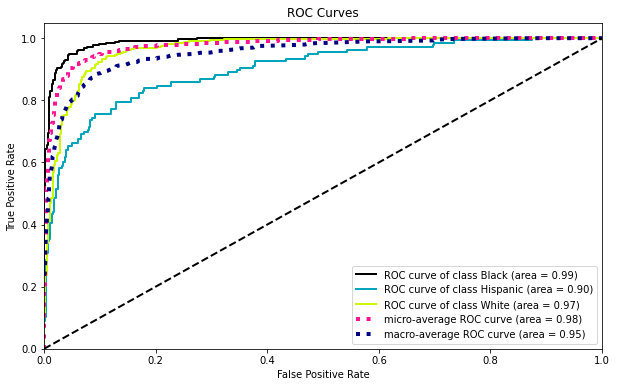

In [ ]:
plt.rcParams["figure.figsize"] = (10,6)
y_pred_proba = Grid_Log_Model.predict_proba(x_test)
plot_roc(y_test, y_pred_proba)
plt.show();


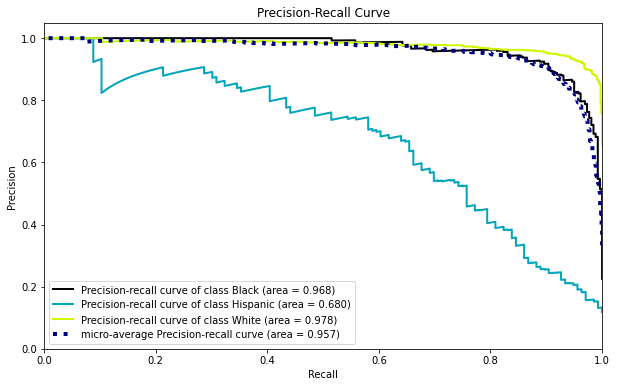

In [ ]:
plot_precision_recall(y_test, y_pred_proba)
plt.show();

# Logistic Refression solver "liblenear"

In [ ]:
# here the logistic regression for the solver liblinear
Operations = [("ColumnTransformer",Column_Transform ),
              ("Scaler", MinMaxScaler()),
              ("Logistic_Reg", LogisticRegression(class_weight="balanced",
                max_iter=10000,
                C=0.01,
                random_state=101,
                solver="liblinear",
                penalty="l1",))]

Pipe_Log_Model_libl = Pipeline(steps=Operations)

In [ ]:
Pipe_Log_Model_libl.fit(x_train, y_train)
eval_metric(Pipe_Log_Model_libl, x_train, y_train, x_test, y_test)

Test_Set
[[ 61  18 181]
 [  4  36  96]
 [ 13   5 740]]
              precision    recall  f1-score   support

       Black       0.78      0.23      0.36       260
    Hispanic       0.61      0.26      0.37       136
       White       0.73      0.98      0.83       758

    accuracy                           0.73      1154
   macro avg       0.71      0.49      0.52      1154
weighted avg       0.73      0.73      0.67      1154


Train_Set
[[ 251   53  734]
 [  17  142  384]
 [  38   11 2985]]
              precision    recall  f1-score   support

       Black       0.82      0.24      0.37      1038
    Hispanic       0.69      0.26      0.38       543
       White       0.73      0.98      0.84      3034

    accuracy                           0.73      4615
   macro avg       0.75      0.50      0.53      4615
weighted avg       0.74      0.73      0.68      4615



Make a scorer for the Hispanic and Black Race

In [ ]:
scoring = {
    "recall_Hispanic": make_scorer(recall_score, average=None, labels=["Hispanic"]),
    "recall_Black": make_scorer(recall_score, average=None, labels=["Black"]),
    "f1_Hispanic": make_scorer(f1_score, average=None, labels=["Hispanic"]),
    "f1_Black": make_scorer(f1_score, average=None , labels=["Black"])
}

In [ ]:
Operations = [("ColumnTransformer",Column_Transform ),
              ("Scaler", MinMaxScaler()),
              ("Logistic_Reg", LogisticRegression(class_weight="balanced",
                max_iter=10000,
                C=0.01,
                random_state=101,
                solver="liblinear",
                penalty="l1",))]

Pipe_Log_Model_libl = Pipeline(steps=Operations)

In [ ]:
scores = cross_validate(Pipe_Log_Model_libl, x_train, y_train,
                        scoring = scoring ,
                        n_jobs=-1, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]
# the scores are very bad
#it was failure plan

test_recall_Hispanic    0.230
train_recall_Hispanic   0.239
test_recall_Black       0.101
train_recall_Black      0.108
test_f1_Hispanic        0.341
train_f1_Hispanic       0.355
test_f1_Black           0.180
train_f1_Black          0.192
dtype: float64

## 2. SVC

In [ ]:
from sklearn.svm import SVC

In [ ]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 

### Vanilla SVC model

In [ ]:
from sklearn.pipeline import Pipeline

Operations = [("ColumnTransformer",Column_Transform ),
              ("Scaler", MinMaxScaler()),
              ("SVM", SVC(class_weight="balanced",probability = True))]

Pipe_SVM_Model = Pipeline(steps=Operations)




In [ ]:
Pipe_SVM_Model.fit(x_train, y_train)


Pipeline(steps=[('ColumnTransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'SubjectsBirthLocation'])])),
                ('Scaler', MinMaxScaler()),
                ('SVM', SVC(class_weight='balanced', probability=True))])

In [ ]:

eval_metric(Pipe_SVM_Model, x_train, y_train, x_test, y_test)

Test_Set
[[236  17   7]
 [  8 104  24]
 [ 15 114 629]]
              precision    recall  f1-score   support

       Black       0.91      0.91      0.91       260
    Hispanic       0.44      0.76      0.56       136
       White       0.95      0.83      0.89       758

    accuracy                           0.84      1154
   macro avg       0.77      0.83      0.79      1154
weighted avg       0.88      0.84      0.85      1154


Train_Set
[[ 949   49   40]
 [  22  450   71]
 [  52  388 2594]]
              precision    recall  f1-score   support

       Black       0.93      0.91      0.92      1038
    Hispanic       0.51      0.83      0.63       543
       White       0.96      0.85      0.90      3034

    accuracy                           0.87      4615
   macro avg       0.80      0.87      0.82      4615
weighted avg       0.90      0.87      0.88      4615



In [ ]:
from sklearn.model_selection import cross_validate
scores = cross_validate(Pipe_SVM_Model,
                        x_train,
                        y_train,
                        scoring=['accuracy', 'precision_weighted','recall_weighted','f1_weighted'],
                        cv = 10,
                        n_jobs=-1,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy              0.847
train_accuracy             0.865
test_precision_weighted    0.882
train_precision_weighted   0.899
test_recall_weighted       0.847
train_recall_weighted      0.865
test_f1_weighted           0.858
train_f1_weighted          0.875
dtype: float64

###  SVC Model GridsearchCV

In [ ]:
param_grid_svc = {'SVM__C': [0.001, 0.05, 0.01, 0.1,10],
              'SVM__gamma': ["scale", "auto", 0.2, 0.3],
              'SVM__kernel': ['rbf', 'linear',"poly" , "sigmoid"],
              'SVM__class_weight': ["balanced", None]}

In [ ]:
#estimator name = "SVM"
Operations = [("ColumnTransformer",Column_Transform ),
              ("Scaler", MinMaxScaler()),
              ("SVM", SVC(class_weight="balanced",probability=True))]

Pipe_SVM_Model = Pipeline(steps=Operations)

In [ ]:
svm_scoring = {
    "precision_Hispanic": make_scorer(precision_score, average=None, labels=["Hispanic"]),
    "recall_Hispanic": make_scorer(recall_score, average=None, labels=["Hispanic"]),
    "f1_Hispanic": make_scorer(f1_score, average=None, labels=["Hispanic"]),
}


In [ ]:
Grid_SVM_Model = GridSearchCV(
    Pipe_SVM_Model,
    param_grid_svc,
    scoring=svm_scoring,
    refit = "precision_Hispanic",
    cv=10,
    n_jobs=-1,
    return_train_score=True,
)

In [ ]:
help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
 |  
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "score_samples", "predict", "predict_proba",
 |  "decision_function", "transform" and "inverse_transform" if they are
 |  implemented in the estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either est

In [ ]:
Grid_SVM_Model.fit(x_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('ColumnTransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Gender',
                                                                          'SubjectsBirthLocation'])])),
                                       ('Scaler', MinMaxScaler()),
                                       ('SVM',
                                        SVC(class_weight='balanced',
                                            probability=True))]),
             n_jobs=-1,
             param_grid={'SVM__C': [0.001,...
                         'SVM__gamma': ['scale', 'auto', 0.2, 0.3],
                         'SVM__kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             refit='precision_Hispanic', return_train_score=True,
             scoring={'f1_Hispanic': make_scorer(f1_score, average=None, labels=['Hispanic']),
                      'precision_Hispanic': make_scorer(precision_score, average=None, labels=['Hispanic']),
                      'recall_Hispanic': make_scorer(recall_score, average=None, labels=['Hispanic'])})

In [ ]:
Grid_SVM_Model.best_estimator_

Pipeline(steps=[('ColumnTransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'SubjectsBirthLocation'])])),
                ('Scaler', MinMaxScaler()),
                ('SVM', SVC(C=0.05, gamma=0.2, probability=True))])

In [ ]:
eval_metric(Grid_SVM_Model, x_train, y_train, x_test, y_test)

Test_Set
[[112   3 145]
 [  3  20 113]
 [  1   3 754]]
              precision    recall  f1-score   support

       Black       0.97      0.43      0.60       260
    Hispanic       0.77      0.15      0.25       136
       White       0.75      0.99      0.85       758

    accuracy                           0.77      1154
   macro avg       0.83      0.52      0.56      1154
weighted avg       0.80      0.77      0.72      1154


Train_Set
[[ 526    6  506]
 [  29   76  438]
 [   3    3 3028]]
              precision    recall  f1-score   support

       Black       0.94      0.51      0.66      1038
    Hispanic       0.89      0.14      0.24       543
       White       0.76      1.00      0.86      3034

    accuracy                           0.79      4615
   macro avg       0.87      0.55      0.59      4615
weighted avg       0.82      0.79      0.75      4615



In [ ]:
Grid_SVM_Model.best_params_

{'SVM__C': 0.05,
 'SVM__class_weight': None,
 'SVM__gamma': 0.2,
 'SVM__kernel': 'rbf'}

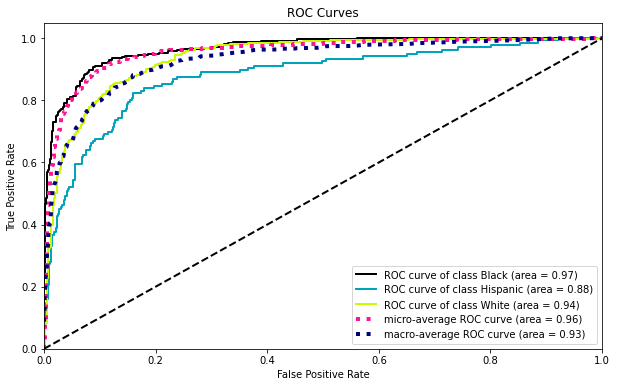

In [ ]:
plt.rcParams["figure.figsize"] = (10,6)
y_pred_proba = Grid_SVM_Model.predict_proba(x_test)
plot_roc(y_test, y_pred_proba)
plt.show();


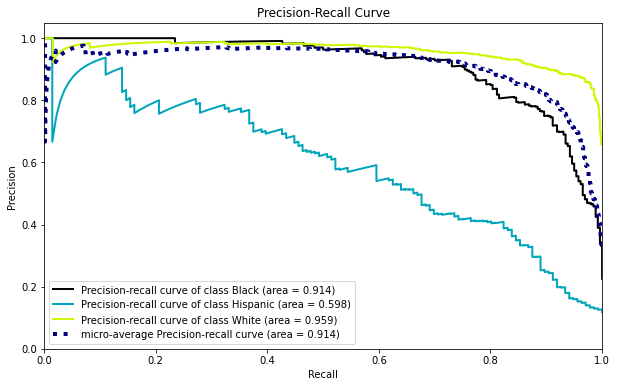

In [ ]:
plot_precision_recall(y_test, y_pred_proba)
plt.show();

## 3. RF

### Vanilla RF Model

In [39]:
from sklearn.preprocessing import OrdinalEncoder

Col_ordinal = x_train.select_dtypes("object").columns
Col_ordinal

Index(['Gender', 'Date', 'Installation', 'Component', 'Branch', 'PrimaryMOS',
       'SubjectsBirthLocation', 'Ethnicity', 'WritingPreference'],
      dtype='object')

In [40]:
Ord_encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)

Column_Transfotmer = make_column_transformer((Ord_encoder, Col_ordinal), remainder="passthrough")

In [ ]:
Operations_RF = [
    ("OrdinalEncoder", Column_Transfotmer),
    ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101)),
]

Pipe_Model_RF = Pipeline(steps=Operations_RF)

Pipe_Model_RF.fit(x_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [ ]:
eval_metric(Pipe_Model_RF, x_train, y_train, x_test, y_test)

Test_Set
[[180   0  80]
 [  7  11 118]
 [  7   4 747]]
              precision    recall  f1-score   support

       Black       0.93      0.69      0.79       260
    Hispanic       0.73      0.08      0.15       136
       White       0.79      0.99      0.88       758

    accuracy                           0.81      1154
   macro avg       0.82      0.59      0.61      1154
weighted avg       0.81      0.81      0.77      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [ ]:
RF_scoring = {
    "precision_Hispanic": make_scorer(precision_score, average=None, labels=["Hispanic"]),
    "recall_Hispanic": make_scorer(recall_score, average=None, labels=["Hispanic"]),
    "f1_Hispanic": make_scorer(f1_score, average=None, labels=["Hispanic"]),
}

In [ ]:
Operations_RF = [
    ("OrdinalEncoder", Column_Transfotmer),
    ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101)),
]

Pipe_ModelRF_CV= Pipeline(steps=Operations_RF)

Scores_CV = cross_validate(
    Pipe_ModelRF_CV, x_train, y_train, scoring=RF_scoring, cv=5, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(Scores_CV, index=range(1, 6))
df_scores.mean()[2:]

test_precision_Hispanic    0.707
train_precision_Hispanic   1.000
test_recall_Hispanic       0.042
train_recall_Hispanic      1.000
test_f1_Hispanic           0.079
train_f1_Hispanic          1.000
dtype: float64

### RF Model GridsearchCV

In [ ]:

param_grid = {"RF_model__max_features":['auto',None, 3, 5, 7],
              "RF_model__max_depth": [None, 2, 3],
              "RF_model__min_samples_leaf": [2, 3, 5],
              "RF_model__n_estimators": [400, 500],
              "RF_model__min_samples_split": [2, 3,4,5]}

In [ ]:
Operations_RF = [
    ("OrdinalEncoder", Column_Transfotmer),
    ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101)),
]

Pipe_ModelRF_Grid= Pipeline(steps=Operations_RF)

In [ ]:
precision_Hispanic = make_scorer(precision_score, average=None, labels=["Hispanic"])
recall_Hispanic = make_scorer(recall_score, average=None, labels=["Hispanic"])
f1_Hispanic = make_scorer(f1_score, average=None, labels=["Hispanic"])

In [ ]:
Model_RF_Grid = GridSearchCV(
    Pipe_ModelRF_Grid, param_grid, scoring=recall_Hispanic , n_jobs=-1, return_train_score=True
)

In [ ]:
Model_RF_Grid.fit(x_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'SubjectsBirthLocation'], dtype='object'))])),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [None, 2, 3],
                         'RF_model__max_features': ['auto', None, 3, 5, 7],
             

In [ ]:
Model_RF_Grid.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=2,
                                        max_features=3, min_samples_leaf=2,
                                        n_estimators=400, random_state=101))])

In [ ]:
Model_RF_Grid.best_params_

{'RF_model__max_depth': 2,
 'RF_model__max_features': 3,
 'RF_model__min_samples_leaf': 2,
 'RF_model__min_samples_split': 2,
 'RF_model__n_estimators': 400}

In [ ]:
pd.DataFrame(Model_RF_Grid.cv_results_).loc[Model_RF_Grid.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.670
mean_train_score   0.707
Name: 168, dtype: object

In [ ]:
Model_RF_Grid.best_score_

0.6702854230377165

In [ ]:
eval_metric(Model_RF_Grid, x_train, y_train, x_test, y_test)

Test_Set
[[170  67  23]
 [  9  94  33]
 [ 51 325 382]]
              precision    recall  f1-score   support

       Black       0.74      0.65      0.69       260
    Hispanic       0.19      0.69      0.30       136
       White       0.87      0.50      0.64       758

    accuracy                           0.56      1154
   macro avg       0.60      0.62      0.54      1154
weighted avg       0.76      0.56      0.61      1154


Train_Set
[[ 673  278   87]
 [  34  384  125]
 [ 156 1342 1536]]
              precision    recall  f1-score   support

       Black       0.78      0.65      0.71      1038
    Hispanic       0.19      0.71      0.30       543
       White       0.88      0.51      0.64      3034

    accuracy                           0.56      4615
   macro avg       0.62      0.62      0.55      4615
weighted avg       0.78      0.56      0.62      4615



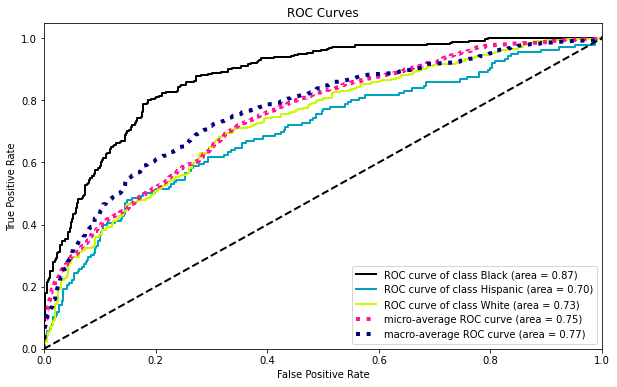

In [ ]:
Operations_RF = [
    ("OrdinalEncoder", Column_Transfotmer),
    ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101,max_depth=2,n_estimators=400,
                                       max_features=3,min_samples_leaf =2,min_samples_split = 2)),]


Pipe_ModelRF_afterGrid= Pipeline(steps=Operations_RF)


Pipe_ModelRF_afterGrid.fit(x_train, y_train)

y_pred_proba = Pipe_ModelRF_afterGrid.predict_proba(x_test)

plot_roc(y_test, y_pred_proba)
plt.show();

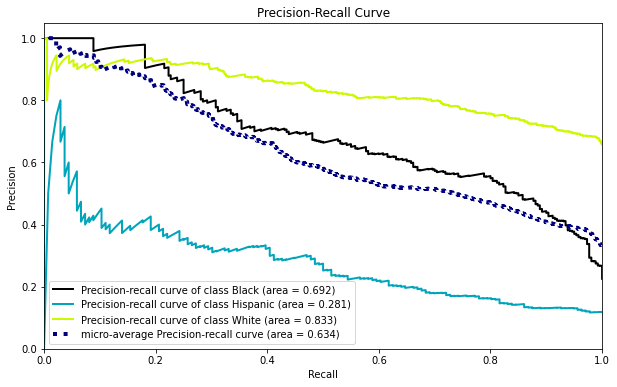

In [ ]:

plot_precision_recall(y_test, y_pred_proba)
plt.show();

## 4. XGBoost

### Vanilla XGBoost Model

In [41]:
Operations_XGB = [
    ("OrdinalEncoder", Column_Transfotmer),
    ("XGB_Model", XGBClassifier(random_state=101)),
]

Pipe_model_XGB = Pipeline(steps=Operations_XGB)
# sorting will be same as classification_report.
y_train_XGB = y_train.map({"White": 0,"Black": 1, "Hispanic": 2 })
y_test_XGB = y_test.map({"White": 0,  "Black": 1,"Hispanic": 2})
# If the target is not numeric in xgb 1.6 and higher versions, it returns an error.
# That's why we do the conversion manually.


Pipe_model_XGB.fit(x_train, y_train_XGB)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'Date', 'Installation', 'Component', 'Branch', 'PrimaryMOS',
       'SubjectsBirthLocation', 'Ethnicity', 'WritingPreference'],
      dtype='object'))])),
                ('XGB_Model',
                 XGBClassifie...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [ ]:
eval_metric(Pipe_model_XGB, x_train, y_train_XGB, x_test, y_test_XGB)

Test_Set
[[738   8  12]
 [ 30 220  10]
 [ 69   6  61]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.93       758
           1       0.94      0.85      0.89       260
           2       0.73      0.45      0.56       136

    accuracy                           0.88      1154
   macro avg       0.85      0.76      0.79      1154
weighted avg       0.88      0.88      0.87      1154


Train_Set
[[3034    0    0]
 [   0 1038    0]
 [   0    0  543]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3034
           1       1.00      1.00      1.00      1038
           2       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [ ]:
Scoring_XGB = {
    "precision_Hispanic": make_scorer(precision_score, average=None, labels=[2]),
    "recall_Hispanic": make_scorer(recall_score, average=None, labels=[2]),
    "f1_Hispanic": make_scorer(f1_score, average=None, labels=[2]),
}


In [ ]:
Operations_XGB = [
    ("OrdinalEncoder", Column_Transfotmer),
    ("XGB_Model",XGBClassifier(random_state=42)),
]

Pipe_ModelXGB_CV= Pipeline(steps=Operations_XGB)

Scores_CV = cross_validate(
    Pipe_ModelXGB_CV, x_train, y_train_XGB, scoring=Scoring_XGB, cv=5, n_jobs=-1, return_train_score=True
)
df_scores_XGB_Hisp = pd.DataFrame(Scores_CV, index = range(1, 6))
df_scores_XGB_Hisp.mean()[2:]

test_precision_Hispanic    0.775
train_precision_Hispanic   1.000
test_recall_Hispanic       0.398
train_recall_Hispanic      1.000
test_f1_Hispanic           0.524
train_f1_Hispanic          1.000
dtype: float64

In [ ]:
df_scores_XGB_Hisp

,fit_time,score_time,test_precision_Hispanic,train_precision_Hispanic,test_recall_Hispanic,train_recall_Hispanic,test_f1_Hispanic,train_f1_Hispanic
1,14.029,0.031,0.740,1.000,0.343,1.000,0.468,1.000
2,14.309,0.037,0.879,1.000,0.472,1.000,0.614,1.000
3,14.264,0.031,0.734,1.000,0.431,1.000,0.543,1.000
4,14.013,0.031,0.729,1.000,0.394,1.000,0.512,1.000
5,14.154,0.031,0.792,1.000,0.349,1.000,0.484,1.000


### XGBoost Model GridsearchCV

In [ ]:
param_grid = {"XGB_Model__n_estimators":[50, 100, 200],
              'XGB_Model__max_depth':[3,4,5],
              "XGB_Model__learning_rate": [0.1, 0.2],
              "XGB_Model__subsample":[0.5, 0.8, 1],
              "XGB_Model__colsample_bytree":[0.5,0.7, 1]}

In [ ]:
precision_Hispanic = make_scorer(precision_score, average=None, labels=[2])
recall_Hispanic = make_scorer(recall_score, average=None, labels=[2])
f1_Hispanic = make_scorer(f1_score, average=None, labels=[2])

In [ ]:
Operations_XGB = [
    ("OrdinalEncoder", Column_Transfotmer),
    ("XGB_Model",XGBClassifier(random_state=42)),
]

Pipe_ModelXGB_Grid= Pipeline(steps=Operations_XGB)

XGB_Grid_Model = GridSearchCV(
    Pipe_ModelXGB_Grid,
    param_grid,
    scoring=recall_Hispanic ,
    cv=5,
    n_jobs=-1,
    return_train_score=True,
)

In [ ]:
XGB_Grid_Model.fit(x_train, y_train_XGB)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'SubjectsBirthLocation'], dtype='object'))])),
                                       ('XGB_Model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_byle...
                                               

In [ ]:
XGB_Grid_Model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation'], dtype='object'))])),
                ('XGB_Model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=No...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=N

In [ ]:
XGB_Grid_Model.best_params_

{'XGB_Model__colsample_bytree': 1,
 'XGB_Model__learning_rate': 0.2,
 'XGB_Model__max_depth': 3,
 'XGB_Model__n_estimators': 200,
 'XGB_Model__subsample': 0.8}

In [ ]:
pd.DataFrame(XGB_Grid_Model.cv_results_).loc[XGB_Grid_Model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.416
mean_train_score   0.968
Name: 142, dtype: object

In [ ]:
XGB_Grid_Model.best_score_

0.4161739721372749

In [ ]:
eval_metric(XGB_Grid_Model, x_train, y_train_XGB, x_test, y_test_XGB)

Test_Set
[[734   7  17]
 [ 28 226   6]
 [ 63  13  60]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       758
           1       0.92      0.87      0.89       260
           2       0.72      0.44      0.55       136

    accuracy                           0.88      1154
   macro avg       0.84      0.76      0.79      1154
weighted avg       0.88      0.88      0.87      1154


Train_Set
[[3032    1    1]
 [   7 1030    1]
 [  41    3  499]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3034
           1       1.00      0.99      0.99      1038
           2       1.00      0.92      0.96       543

    accuracy                           0.99      4615
   macro avg       0.99      0.97      0.98      4615
weighted avg       0.99      0.99      0.99      4615



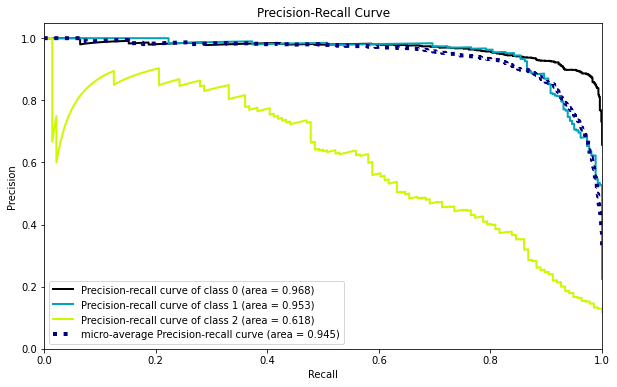

In [ ]:
Operations_XGB = [
    ("OrdinalEncoder", Column_Transfotmer),
    ("XGB_model", XGBClassifier( colsample_bytree=1,learning_rate=0.2,max_depth=3,n_estimators=200,subsample=0.8,
                                random_state=101),),]

# create a pipeline for the XGBoosting Modelwith the best Parameters
Pipe_XGBModel_PAR = Pipeline(steps=Operations_XGB)

Pipe_XGBModel_PAR.fit(x_train, y_train_XGB)

y_pred_proba = Pipe_XGBModel_PAR.predict_proba(x_test)
#Plotting Precision-Recall Curve for the XGBoost model with GridSearch's best Parameters
plot_precision_recall(y_test_XGB, y_pred_proba)
plt.show()

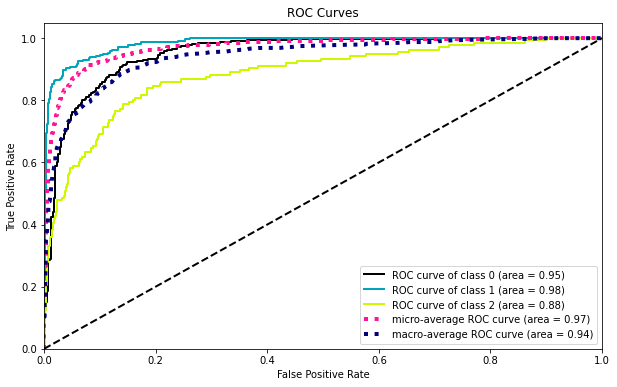

In [ ]:
#Plotting LOC Curve for the XGBoost model with GridSearch's best Parameters
plot_roc(y_test_XGB, y_pred_proba)
plt.show()

---
---

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [ ]:
!pip install imblearn

  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2


In [8]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [44]:
column_Transform = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), ['Gender','SubjectsBirthLocation']),
                                       remainder=MinMaxScaler())

In [49]:
X_train_ohe = column_Transform.fit_transform(x_train)
#this strange error prevent me to complete the over/under process

ValueError: ignored

In [43]:
df_soliders["DODRace"].value_counts()

White       3792
Black       1298
Hispanic     679
Name: DODRace, dtype: int64

In [46]:
#will over samoling Hispanic class with 600 (679+600) --> 1279
# Undersampling White class by 2000 (3792-2000)--> 1792
over = SMOTE(sampling_strategy={"Hispanic": 600})
under = RandomUnderSampler(sampling_strategy={"White": 2000})

In [47]:
X_resampled_over, y_resampled_over = over.fit_resample(x_train, y_train)


ValueError: ignored

In [ ]:
X_resampled_under, y_resampled_under = under.fit_resample(X_train_ohe, y_train)

In [ ]:
#Create a pipeline for the vanilla Logistic regression
# consist of one hot encoder , min max scaler and the Logistic regression model
Operations = [("ColumnTransformer",Column_Transform ),
              ("Scaler", MinMaxScaler()),('over', over),
              ("Logistic_Reg", LogisticRegression())]

Pipe_Log_Model_over = Pipeline(steps=Operations)

In [ ]:
Pipe_Log_Model_over.fit(x_train, y_train)

In [ ]:
eval_metric(Pipe_Log_Model_over, x_train, y_train, x_test, y_test)

## Other Evaluation Metrics for Multiclass Classification

- Evaluation metrics
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [ ]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef?
matthews_corrcoef(y_test, y_pred)

In [ ]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score?
cohen_kappa_score(y_test, y_pred)

# Before the Deployment
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

**The BEST model with the best F1 Score for Hispanic Race is Vanilla Logistic  Regression:**

In [ ]:
#make a column transformer for the different preprocessing steps
Column_Transform = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), ['Gender','SubjectsBirthLocation']),
                                       remainder='passthrough')

In [ ]:
#Create a pipeline for the vanilla Logistic regression
# consist of one hot encoder , min max scaler and the Logistic regression model
Operations = [("ColumnTransformer",Column_Transform ),
              ("Scaler", MinMaxScaler()),
              ("Logistic_Reg", LogisticRegression())]

Pipe_Log_Model = Pipeline(steps=Operations)



In [ ]:
Final_Model = Pipe_Log_Model.fit(x_train, y_train)

In [ ]:
#Evaluation Results for vanilla Logistic regression Best model
eval_metric(Final_Model, x_train, y_train, x_test, y_test)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___